In [1]:
# Spotle AI - NASSCOM Community AI Internship Program

In [2]:
## Project - Analyze Crop Production of India

In this project we have to study and analyse crop production, production contribution to State/country, performance, and high yield production order for crops, crop growing pattern and diversification. Also, you have to forecast the product of the crop for future periods, which can be used to formulate crop-related schemes.

## The Problem Statements:
1.Find the average production of the crops in India.


2.Which crop has maximum yield (Tonnes / Hectare)?


3.Write a comparative study on Rice production between Odisha and West Bengal.


4.Which State has the highest production of Wheat?


5.Build a model to predict the production of Rice in 2014 for Andhra Pradesh, Uttar Pradesh and Tamil Nadu


**Author: NIBEDITA MAL**

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
#to ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [6]:
#reading data from file
url="https://cdn.spotle.ai/datasets/state-wise-crop-production-India.zip"
df=pd.read_csv(url)

In [7]:
df

State  Year        Crop      Area  Production
0      Andaman and Nicobar Islands  2000    Arecanut    4354.0      7200.0
1      Andaman and Nicobar Islands  2000      Banana    1707.0     12714.0
2      Andaman and Nicobar Islands  2000   Cashewnut     800.0       219.0
3      Andaman and Nicobar Islands  2000    Coconut    25160.0  89000000.0
4      Andaman and Nicobar Islands  2000  Dry ginger     388.0      1220.0
...                            ...   ...         ...       ...         ...
10699                  West Bengal  2013   Sugarcane   17021.0   1945042.0
10700                  West Bengal  2013   Sunflower    6434.0      8717.0
10701                  West Bengal  2013     Tobacco   12570.0     22287.0
10702                  West Bengal  2013        Urad   70052.0     48810.0
10703                  West Bengal  2013       Wheat  331481.0    927837.0

[10704 rows x 5 columns]

In [8]:
#to find the number of columns and rows
df.shape

(10704, 5)

In [9]:
#to find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 0 to 10703
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       10704 non-null  object 
 1   Year        10704 non-null  int64  
 2   Crop        10704 non-null  object 
 3   Area        10704 non-null  float64
 4   Production  10704 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 418.2+ KB


In [10]:
df.describe()

Year          Area    Production
count  10704.000000  1.070400e+04  1.070400e+04
mean    2006.134342  2.126362e+05  1.115409e+07
std        3.973598  7.238971e+05  2.263971e+08
min     2000.000000  1.000000e+00  0.000000e+00
25%     2003.000000  1.506000e+03  1.500000e+03
50%     2006.000000  1.096650e+04  1.551650e+04
75%     2010.000000  9.252500e+04  1.424018e+05
max     2013.000000  1.237800e+07  6.326000e+09

In [11]:
#now we will check if our dataset contains null or missing values
df.isnull().sum()

State         0
Year          0
Crop          0
Area          0
Production    0
dtype: int64

In [12]:
#to see the years in our dataset
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 2007, 2008, 2009,
       2011, 2012, 2013], dtype=int64)

In [13]:
#to see the states of our dataset
df['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

**1.Find the average production of the crops in India.**

According to the first question we have calculate the average production of crops in India.For this,we create a dataframe caaled avg_production and call .mean() function.By calling .groupby() function we get the average production of crop.

In [14]:
avg_production = df['Production'].mean()
groupby_total_production = df.groupby(['Crop']).mean()

Now we will print the average value of crop production.

In [16]:
print('Average Production of Crops in India is: ' + str(groupby_total_production))

Average Production of Crops in India is:                             Year          Area    Production
Crop                                                        
Apple                2002.500000  4.500000e+00  0.000000e+00
Arcanut (Processed)  2002.000000  1.441160e+05  1.928310e+05
Arecanut             2006.280000  4.963545e+04  1.674254e+05
Arhar/Tur            2006.267797  1.545573e+05  1.060493e+05
Ash Gourd            2002.500000  8.220000e+02  0.000000e+00
...                          ...           ...           ...
Wheat                2006.205797  1.084402e+06  3.136744e+06
Yam                  2002.500000  8.875000e+02  0.000000e+00
other fibres         2002.333333  4.212667e+03  0.000000e+00
other misc. pulses   2001.800000  6.168600e+03  1.940844e+03
other oilseeds       2005.750000  3.888168e+04  6.003707e+04

[122 rows x 3 columns]


**2.Which crop has maximum yield (Tonnes / Hectare)?**

According to the above question we have to calculate the maximum yeild i.e max production of the crop.
For this we will call the .max() function and print the the max amount of production.

In [17]:
max_yeild=df['Production'].max()
print('Max yeild:' + str(max_yeild))

Max yeild:6326000000.0


Now we will print the crop name which has the max amount of production.

In [18]:
df[df['Production']==6326000000.0]

State  Year      Crop      Area    Production
4651  Kerala  2005  Coconut   897833.0  6.326000e+09

We can see from the above table that Coconut has maximum yeild which is 6.326000000.0 Tonnes.Kerala produced max amount of coconuts in the year 2005.

**3.Write a comparative study on Rice production between Odisha and West Bengal.**

According to the above question,we have to do a comparision of rice production between West Bengal and Odisha.
For this,at first we have to create a dataframe for rice crop.

In [20]:
rice_df=df[df['Crop']=='Rice']

Now we have to create a dataframe for West Bengal Rice Production.

In [21]:
west_bengal_rice_production_df=rice_df[df['State']=='West Bengal']
west_bengal_rice_production_df

State  Year  Crop       Area  Production
10211  West Bengal  2000  Rice  5435323.0  12428038.0
10250  West Bengal  2001  Rice  5503087.0  13815548.0
10289  West Bengal  2002  Rice  5842127.0  14389238.0
10328  West Bengal  2003  Rice  5856607.0  14662239.0
10366  West Bengal  2004  Rice  5783613.0  14884889.0
10405  West Bengal  2005  Rice  5782949.0  14510742.0
10444  West Bengal  2006  Rice  5687028.0  14745892.0
10482  West Bengal  2007  Rice  5719755.0  14719520.0
10522  West Bengal  2008  Rice  5935696.0  15037240.0
10556  West Bengal  2009  Rice  5630095.0  14340605.0
10590  West Bengal  2010  Rice  4944146.0  13389610.0
10624  West Bengal  2011  Rice  5433700.0  14605766.0
10658  West Bengal  2012  Rice  5444318.0  14946735.0
10693  West Bengal  2013  Rice  5513687.0  15376869.0

Now,we create two lists.One is for West Bengal Crop Production Year and another one is for the Production of Rice in West Bengal.

In [22]:
df_west_bengal_rice_production_year=[2000,2001,2002,2003,2004,2005,2006,2006,2007,2008,2009,
                                     2010,2011,2012,2013]
df_west_bengal_rice_production=[12428038.0,13815548.0,14389238.0,14662239.0,14884889.0,14510742.0,14745892.0,
                  1471920.0,15037240.0,14340605.0,13389610.0,14605766.0,1496735.0,15376869.0]

In [23]:
rice_df=df[df['Crop']=='Rice']
odisha_rice_production_df=rice_df[df['State']=='Odisha']
odisha_rice_production_df

State  Year  Crop        Area  Production
6738  Odisha  2000  Rice   4433520.0   4613380.0
6773  Odisha  2001  Rice   4500000.0   7220000.0
6807  Odisha  2002  Rice   4273000.0   3278000.0
6841  Odisha  2003  Rice   4501000.0   6801000.0
6873  Odisha  2004  Rice   4492000.0   6536000.0
6892  Odisha  2005  Rice   4479000.0   6858000.0
6905  Odisha  2006  Rice   4451000.0   6823000.0
6918  Odisha  2007  Rice   4452000.0   7540000.0
6931  Odisha  2008  Rice   4455000.0   6812000.0
6944  Odisha  2009  Rice   4365000.0   6913000.0
6957  Odisha  2010  Rice   4226000.0   6824000.0
6971  Odisha  2011  Rice   4005000.0   5806000.0
6984  Odisha  2012  Rice  12378000.0   9496000.0
6997  Odisha  2013  Rice   4180000.0   7610000.0

In [24]:
df_odisha_rice_production_year=[2000,2001,2002,2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013]
df_odisha_rice_production=[4613380.0,7220000.0,3278000.0,6801000.0,6536000.0,6858000.0,
                   6823000.0,7540000.0,6812000.0,6913000.0,6824000.0,5806000.0,9496000.0,7610000.0]

Now,we will set a plot for rice production of these two states.

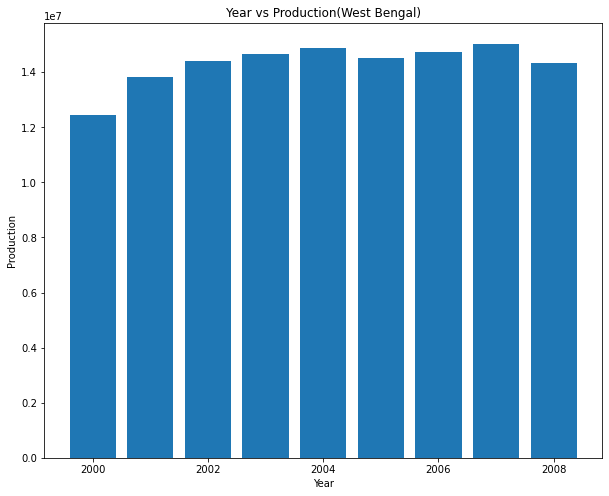

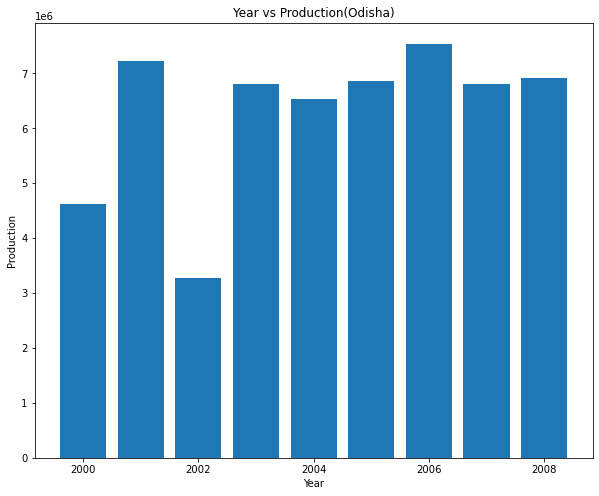

In [25]:
plt.figure(figsize=(10,8))
plt.bar(df_west_bengal_rice_production_year[0:10],df_west_bengal_rice_production[0:10])
plt.title('Year vs Production(West Bengal)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()
plt.figure(figsize=(10,8))
plt.bar(df_odisha_rice_production_year[0:10],df_odisha_rice_production[0:10])
plt.title('Year vs Production(Odisha)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

By the two above graph we can see in 2000 West Bengal's Rice Production is much higher than Odisha's production.Similar for othes years also,the rice production in West Bengal is much higher than Odisha.2000-2013 West Bengal every time produces rice more than 1cr. bt Odisha's highest production is 9496000.0 in 2012.So we can say West Bengal is better rice producing state than Odisha.

**4.Which State has the highest production of Wheat?**

According to the above question we have to show the state name which has the highest wheat production in India.
For this,we call the .max() function to crate a dataframe for max wheat.Then we call .sum() and .groupby() function to get the state name which has the maximum wheat production in india.

In [26]:
max_wheat = df[df['Crop'] == 'Wheat'].max()
total_wheat = df[df['Crop'] == 'Wheat'].sum()
groupby_max_wheat = df.groupby(['Production']).sum()

Now,we will print the state name which has the max wheat production.

In [27]:
print('Maximum Wheat Production : ' + str(max_wheat))

Maximum Wheat Production : State         West Bengal
Year                 2013
Crop                Wheat
Area            9839197.0
Production     31892480.0
dtype: object


So,we can see West Bengal had produced maximum amount of wheat in the year 2013.

**5.Build a model to predict the production of Rice in 2014 for Andhra Pradesh, Uttar Pradesh and Tamil nadu.**

In [28]:
rice_df=df[df['Crop']=='Rice']
andhra_pradesh_rice_production_df=rice_df[df['State']=='Andhra Pradesh']
andhra_pradesh_rice_production_df

State  Year  Crop       Area  Production
121  Andhra Pradesh  2000  Rice  2694741.0   8040667.0
162  Andhra Pradesh  2001  Rice  2515353.0   7823692.0
220  Andhra Pradesh  2002  Rice  1867142.0   5315408.0
277  Andhra Pradesh  2003  Rice  1957323.0   6054099.0
318  Andhra Pradesh  2004  Rice  2227682.0   7392678.0
357  Andhra Pradesh  2005  Rice  2520723.0   7288721.0
396  Andhra Pradesh  2006  Rice  2488883.0   7616392.0
425  Andhra Pradesh  2007  Rice  2576000.0   8880000.0
458  Andhra Pradesh  2008  Rice  2695725.0   8880586.0
496  Andhra Pradesh  2009  Rice  2325729.0   7569071.0
536  Andhra Pradesh  2010  Rice  2772377.0   7883078.0
578  Andhra Pradesh  2011  Rice  2346300.0   7744175.0
624  Andhra Pradesh  2012  Rice  2209237.0   6862854.0
673  Andhra Pradesh  2013  Rice  2583440.0   7993425.0

In [29]:
rice_df=df[df['Crop']=='Rice']
uttar_pradesh_rice_production_df=rice_df[df['State']=='Uttar Pradesh']
uttar_pradesh_rice_production_df

State  Year  Crop       Area  Production
9365  Uttar Pradesh  2000  Rice  5907151.0  11679149.0
9388  Uttar Pradesh  2001  Rice  6071325.0  12855857.0
9414  Uttar Pradesh  2002  Rice  5213429.0   9596346.0
9441  Uttar Pradesh  2003  Rice  5727772.0  12494939.0
9466  Uttar Pradesh  2004  Rice  5934405.0  10749989.0
9492  Uttar Pradesh  2005  Rice  5571524.0  11119095.0
9524  Uttar Pradesh  2006  Rice  5920752.0  11123613.0
9554  Uttar Pradesh  2007  Rice  5709388.0  11780112.0
9586  Uttar Pradesh  2008  Rice  6033382.0  13097031.0
9618  Uttar Pradesh  2009  Rice  5172741.0  10776504.0
9648  Uttar Pradesh  2010  Rice  5657070.0  11992299.0
9681  Uttar Pradesh  2011  Rice  5946285.0  14022392.0
9714  Uttar Pradesh  2012  Rice  5861282.0  14415939.0
9747  Uttar Pradesh  2013  Rice  5982369.0  14635836.0

In [30]:
rice_df=df[df['Crop']=='Rice']
tamil_nadu_rice_production_df=rice_df[df['State']=='Tamil Nadu']
tamil_nadu_rice_production_df

State  Year  Crop       Area  Production
8133  Tamil Nadu  2000  Rice  2113344.0   7217903.0
8151  Tamil Nadu  2001  Rice  2059878.0   6583630.0
8214  Tamil Nadu  2002  Rice  1516537.0   3577108.0
8292  Tamil Nadu  2003  Rice  1396651.0   3222776.0
8331  Tamil Nadu  2004  Rice  1872822.0   5061622.0
8368  Tamil Nadu  2005  Rice  2050455.0   5209433.0
8404  Tamil Nadu  2006  Rice  1931397.0   6610607.0
8439  Tamil Nadu  2007  Rice  1789170.0   5039954.0
8473  Tamil Nadu  2008  Rice  1931603.0   5183385.0
8507  Tamil Nadu  2009  Rice  1845553.0   5665258.0
8526  Tamil Nadu  2010  Rice  1905726.0   5792415.0
8555  Tamil Nadu  2011  Rice  1903772.0   7458657.0
8574  Tamil Nadu  2012  Rice  1493276.0   4050334.0
8602  Tamil Nadu  2013  Rice  1725730.0   7115195.0

Now that we have trained our algorithm, its time to make some predictions

In [31]:
crop_data=pd.get_dummies(data=df)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=crop_data.drop('Production',axis=1)
X.head()

Year     Area  State_Andaman and Nicobar Islands  State_Andhra Pradesh  \
0  2000   4354.0                                  1                     0   
1  2000   1707.0                                  1                     0   
2  2000    800.0                                  1                     0   
3  2000  25160.0                                  1                     0   
4  2000    388.0                                  1                     0   

   State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chandigarh  \
0                        0            0            0                 0   
1                        0            0            0                 0   
2                        0            0            0                 0   
3                        0            0            0                 0   
4                        0            0            0                 0   

   State_Chhattisgarh  State_Dadra and Nagar Haveli  ...  Crop_Turmeric  \
0                   0                             0  ...              0   
1                   0                             0  ...              0   
2                   0                             0  ...              0   
3                   0                             0  ...              0   
4                   0                             0  ...              0   

   Crop_Turnip  Crop_Urad  Crop_Varagu  Crop_Water Melon  Crop_Wheat  \
0            0          0            0                 0           0   
1            0          0            0                 0           0   
2            0          0            0                 0           0   
3            0          0            0                 0           0   
4            0          0            0                 0           0   

   Crop_Yam  Crop_other fibres  Crop_other misc. pulses  Crop_other oilseeds  
0         0                  0                        0                    0  
1         0                  0                        0                    0  
2         0                  0                        0                    0  
3         0                  0                        0                    0  
4         0                  0                        0                    0  

[5 rows x 157 columns]

In [34]:
y=crop_data['Production']
y.head()

0        7200.0
1       12714.0
2         219.0
3    89000000.0
4        1220.0
Name: Production, dtype: float64

We have splited our data into training and testing sets,and now we will train our model.

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
from sklearn.linear_model import LinearRegression
crop_model=LinearRegression()
crop_model.fit(X_train,y_train)

LinearRegression()

In [37]:
crop_predictions=crop_model.predict(X_test)
crop_predictions

array([  2753862.8817848 , -13146110.92409587,  23793940.23387146, ...,
        63505173.89427006,   7680127.66949201, -11892716.04433584])

In [38]:
print(X_test)
y_pred=crop_model.predict(X_test)
y_test

      Year       Area  State_Andaman and Nicobar Islands  \
2882  2008   175400.0                                  0   
3933  2000  1022701.0                                  0   
304   2004  1646166.0                                  0   
3325  2011    41197.0                                  0   
2626  2010     7370.0                                  0   
...    ...        ...                                ...   
2102  2007       50.0                                  0   
997   2005    17875.0                                  0   
9648  2010  5657070.0                                  0   
9891  2004       21.0                                  0   
1176  2011    65560.0                                  0   

      State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  State_Bihar  \
2882                     0                        0            0            0   
3933                     0                        0            0            0   
304                      1          

2882      176800.0
3933     1835332.0
304      1442146.0
3325      149000.0
2626        7836.0
           ...    
2102          68.0
997        11309.0
9648    11992299.0
9891           7.0
1176      608023.0
Name: Production, Length: 3533, dtype: float64

In [39]:
y_pred

array([  2753862.8817848 , -13146110.92409587,  23793940.23387146, ...,
        63505173.89427006,   7680127.66949201, -11892716.04433584])

In [40]:
#comparing acrual vs predicted
comp=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

Actual  \
0  2882      176800.0
3933     1835332.0
304     ...   

                                           Predicted  
0  [2753862.8817847967, -13146110.924095869, 2379...